# Anomaly Detection Overview

### What is Anomaly Detection?

    Identifying patterns in data that deviate significantly from the norm (anomalies).
    Examples: Fraudulent transactions, network intrusions, medical diagnosis.

### Why Autoencoders?

    Autoencoders excel at reconstructing inputs they were trained on (normal data).
    Anomalies are harder to reconstruct, resulting in higher reconstruction errors.




# Autoencoders : The Basics

What is an Autoencoder?

    A neural network architecture that learns to reconstruct its input.
    Composed of:
        Encoder: Compresses the input into a lower-dimensional latent space.
        Decoder: Reconstructs the input from the latent representation.

Loss Function:

    Measures the reconstruction error (e.g., Mean Squared Error).

Why Reconstruction Error?

    Normal data (training data) has low reconstruction errors.
    Anomalies, being unfamiliar, yield higher reconstruction errors.



# Key metrics for Anomaly Detection

Reconstruction Error:

    Measures how well the autoencoder reconstructs the input.
    Higher error → More likely an anomaly.

Threshold:

    A cutoff value to classify anomalies.
    Determined using methods like the 95th percentile of reconstruction errors from normal data.



# Training the Autoencoder

    Forward Pass:
        Input → Encoder → Latent Space → Decoder → Reconstructed Input.

    Loss Function:
        Reconstruction Loss= 1/ N ∑(x_original−x_reconstructed)^2
        Measures how well the model reconstructs the input.

    Optimization:
        Use optimizers like Adam to minimize the reconstruction loss.

# Anomaly Detection Process 

Step 1: Calculate Reconstruction Error:

    Measure the error for each input in the test dataset.

Step 2: Set a Threshold:

    Use normal data to determine a threshold for classification.
    Example: 95th percentile of reconstruction errors.

Step 3: Classify Data:

    Reconstruction Error > Threshold → Anomaly.
    Reconstruction Error <= Threshold → Normal.



# Evaluation Metrics 

Precision:

    Precision= True Positives/ (True Positives + False Positives) 
    How many detected anomalies are actually anomalies?

Recall:

    Recall=True Positives/ (True Positives + False Negatives) 
    How many anomalies were detected?

F1-Score:

    Harmonic mean of precision and recall.

ROC-AUC:

    Evaluates the trade-off between true positive rate and false positive rate.



# Imports and Data Preprocessing 

In [7]:
import pandas as pd 
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset 
df = pd.read_csv('./data/creditcard.csv')
scaler = MinMaxScaler()
data = scaler.fit_transform(df.iloc[:,1:-1]) # Exclude the 'Class' column (labels)
labels = df['Class'].values

# Soplit data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Use only non-fradulent data training which is class = 0
X_train = X_train[y_train== 0]
X_test_normal =X_test[y_test== 0]
X_test_anomalous = X_test[y_test== 1]


# Define the autoencoder 

In [8]:
class Autoencoder (nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid() # output between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded) 
        return decoded

# Prepare data for Pytorch 

In [9]:
# Convert data to PyTorch tensors 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_test_normal_tensor = torch.tensor(X_test_normal, dtype=torch.float32)
X_test_anomalous_tensor = torch.tensor(X_test_anomalous, dtype=torch.float32)

# Data loader for training 
train_loader = torch.utils.data.DataLoader(X_train_tensor, batch_size=64, shuffle=True)


# Train the autoencoder

In [11]:
# Initialize the model, loss function and optimizer
input_dim = X_train_tensor.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss() # reconstruction loss 
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# training loop
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0 
    for batch in train_loader:
        # forward pass
        reconstructed = model(batch)
        loss = criterion(reconstructed, batch)

        # backward pass 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

        


Epoch [1/50], Loss: 0.0018
Epoch [2/50], Loss: 0.0008
Epoch [3/50], Loss: 0.0006
Epoch [4/50], Loss: 0.0004
Epoch [5/50], Loss: 0.0004
Epoch [6/50], Loss: 0.0004
Epoch [7/50], Loss: 0.0003
Epoch [8/50], Loss: 0.0002
Epoch [9/50], Loss: 0.0002
Epoch [10/50], Loss: 0.0002
Epoch [11/50], Loss: 0.0002
Epoch [12/50], Loss: 0.0002
Epoch [13/50], Loss: 0.0001
Epoch [14/50], Loss: 0.0001
Epoch [15/50], Loss: 0.0001
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0001
Epoch [18/50], Loss: 0.0001
Epoch [19/50], Loss: 0.0001
Epoch [20/50], Loss: 0.0001
Epoch [21/50], Loss: 0.0001
Epoch [22/50], Loss: 0.0001
Epoch [23/50], Loss: 0.0001
Epoch [24/50], Loss: 0.0001
Epoch [25/50], Loss: 0.0001
Epoch [26/50], Loss: 0.0001
Epoch [27/50], Loss: 0.0001
Epoch [28/50], Loss: 0.0001
Epoch [29/50], Loss: 0.0001
Epoch [30/50], Loss: 0.0001
Epoch [31/50], Loss: 0.0001
Epoch [32/50], Loss: 0.0001
Epoch [33/50], Loss: 0.0001
Epoch [34/50], Loss: 0.0001
Epoch [35/50], Loss: 0.0001
Epoch [36/50], Loss: 0.0001
E

# Evaluate the Model for Anomaly Detection

In [12]:
# set the model to evaluation mode
model.eval()

# Function to calculate reconstruction error
def reconstruction_error(data, model):
    with torch.no_grad():
        reconstructed = model(data)
        error = torch.mean((reconstructed - data)**2, dim=1)    # Mean squared error per sample 
    return error.numpy()

# calculate reconstruction error 
error_normal = reconstruction_error(X_test_normal_tensor, model)
error_anomalous = reconstruction_error(X_test_anomalous_tensor, model)

# Set a threshold for anomaly detection
threshold = np.percentile(error_normal, 95) # 95th percentile of normal data 

# classify anomalies
y_pred = np.concatenate([error_normal, error_anomalous]) > threshold
y_true = np.concatenate([np.zeros(len(error_normal)), np.ones(len(error_anomalous))])

# Print classification report
print(classification_report(y_true, y_pred))






              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     85307
         1.0       0.03      0.88      0.05       136

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443



Class 0.0 (Normal transactions):

    Precision = 1.00: All predicted normal transactions were correct.
    Recall = 0.95: 95% of actual normal transactions were correctly identified.
    F1-Score = 0.97: A high balance of precision and recall.
    Support = 85,307: There are 85,307 normal transactions in the dataset.

Class 1.0 (Fraudulent transactions):

    Precision = 0.03: Out of all predicted frauds, only 3% were actually fraudulent.
    Recall = 0.88: The model identified 88% of actual fraud cases.
    F1-Score = 0.05: Low because precision is poor despite a good recall.
    Support = 136: There are 136 fraudulent transactions in the dataset.



# Visualize reconstruction error 

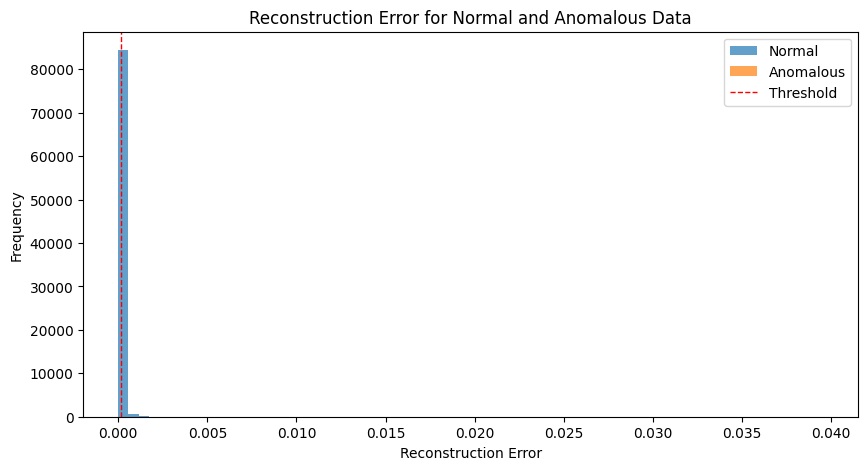

In [14]:
# Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.hist(error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(error_anomalous, bins=50, alpha=0.7, label='Anomalous')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1, label='Threshold')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error for Normal and Anomalous Data")
plt.show()
